<a href="https://colab.research.google.com/github/AndrewDavidRatnam/Gradient-Descent-using-numpy-/blob/main/Gradient_Descent_using_numpy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading And Preprocessing

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris.data[:,2:]

In [ ]:
X.shape

(150, 2)

In [ ]:
y = iris.target

In [ ]:
#X = skleanrn.add_dummy_feature(X)
X = np.c_[np.ones((len(X), 1)),X]
#X1 = X = np.c_[np.ones((len(X))),X] #X1 == X #adds two columns

In [ ]:
#X_train, X_test, y_train, y_test = sklearn.train_test_split(X, y, test_size=0.2)

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X)
test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [ ]:
len(X_train),len(y_train)

(90, 90)

In [ ]:
len(X_valid),len(y_valid)

(30, 30)

In [ ]:
len(X_test),len(y_test)

(30, 30)

In [ ]:
#one_hot_encoded = tf.one_hot(targets, depth) #depth is number of classes
def to_one_hot(y):
  return np.diag(np.ones(y.max() + 1))[y]

In [ ]:
y_train[:3]

array([1, 0, 2])

In [ ]:
to_one_hot(y_train[:3])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
Y_train = to_one_hot(y_train)
Y_valid = to_one_hot(y_valid) #y_train = to_one_hot(y_train) won't work need a different variable
Y_test = to_one_hot(y_test)

In [ ]:
#sklearn.preprocessing.StandardScaler(X)
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [ ]:
X_train.shape

(90, 3)

In [ ]:
def softmax(logits):
  exps = np.exp(logits)
  exp_sums = exps.sum(axis=1, keepdims=True)
  return exps /exp_sums

In [ ]:
n_inputs = X_train.shape[-1] #number of features
n_outputs = len(set(y_train)) # 3 classes

- LOSS FUNCTION
$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

- And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

- Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [ ]:
eta = 0.8 # 0.01
n_epochs = 20_001 # can use early stopping
m = len(X_train) # instances
epsilon = 1e-7 # to avoid log(0)
xentropy_losses = []
np.random.seed(42)
theta = np.random.randn(n_inputs,n_outputs)
e = []
MIN = 2
for epoch in range(n_epochs):
  logits = X_train@theta
  Y_proba = softmax(logits)

  if (epoch % 1_00 == 0): # loss every 1000 epochs >
    Y_proba_valid = softmax(X_valid @ theta)
    xentropy_losses.append(-(Y_valid*np.log(Y_proba_valid + epsilon)).sum(axis=1).mean())
    e.append(epoch)
    #print(epoch, xentropy_losses[-1])
  error = Y_proba - Y_train
  gradients = 1/m*X_train.T@error
  theta = theta - eta*gradients

In [ ]:
print(min(xentropy_losses))

0.10678888728023281


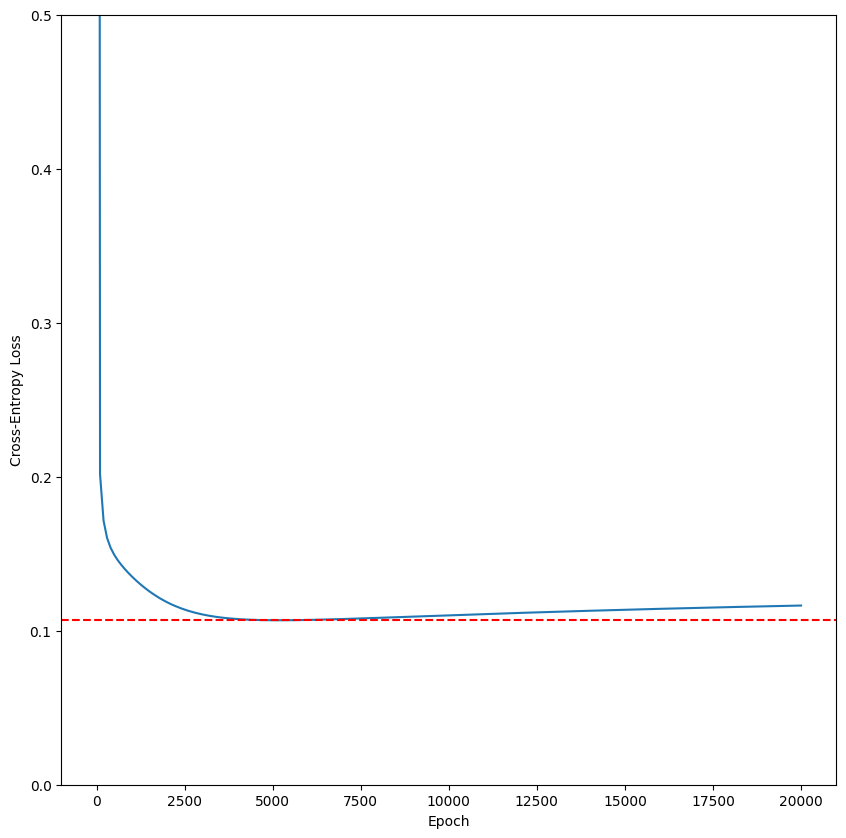

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(e, xentropy_losses)
plt.xlabel('Epoch')
plt.ylim(0,0.5)
plt.axhline(y=min(xentropy_losses), color='r', linestyle='--')
plt.ylabel('Cross-Entropy Loss')
plt.show()

In [ ]:
theta

array([[  1.38150658,   9.28608714,  -9.66145533],
       [-10.05100779,  -3.66125585,  14.76700316],
       [ -7.83988656,   1.32980393,   8.38725579]])

In [ ]:
logits = X_valid@theta
Y_proba = softmax(logits)
y_pred = np.argmax(Y_proba, axis=1)
accuracy_score = np.mean(y_pred == y_valid)
accuracy_score

0.9333333333333333

In [ ]:
#WITH L2 Regularization
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100 #reg hyper param alpha = 1/100 = 0.01
best_loss = np.infty
np.random.seed(42)
theta = np.random.randn(n_inputs, n_outputs)
best_theta = None
count = 0

for epoch in range(n_epochs):
  logits = X_train@theta
  Y_proba = softmax(logits)
  Y_proba_valid = softmax(X_valid@theta)
  xentropy_losses = -(Y_valid* np.log(Y_proba_valid + epsilon))
  l2_loss = 1/2*(theta[1:] ** 2).sum()
  total_loss = xentropy_losses.sum(axis=1).mean() + 1/C * l2_loss
  if epoch % 1000 == 0:
    print(epoch, total_loss.round(4))
  if total_loss < best_loss:
    best_loss = total_loss
    best_theta = theta
  elif count < 20:
    count += 1
    continue
  else:
    print(epoch -20 , best_loss.round(4))
    print(epoch, total_loss.round(4), "early_stopping")
    print("Best theta:" , best_theta)
    break
  error = Y_proba - Y_train
  gradients = 1/m*X_train.T@error #why not just add 1/C *theta[1:]
  gradients += np.r_[np.zeros([1, n_outputs]), 1/C*theta[1:]]
  theta = theta - eta*gradients

0 3.7372
282 0.3256
302 0.3256 early_stopping
Best theta: [[ 0.21824459  1.99447375 -1.20657995]
 [-2.17410185  0.49868836  1.93330136]
 [-1.82756133 -0.2729906   2.55952798]]


In [ ]:
logits = X_valid @ theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

PLOTTING MODELS PREDICTIONS ON THE WHOLE DATASET

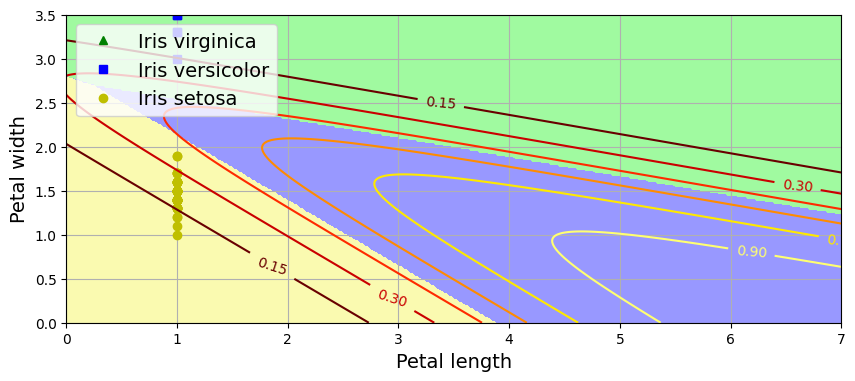

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()
